# Week 3: Day 3 AM // Gaussian Mixture

## Import Libraries

In [ ]:
import sys
import sklearn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Create Dataset

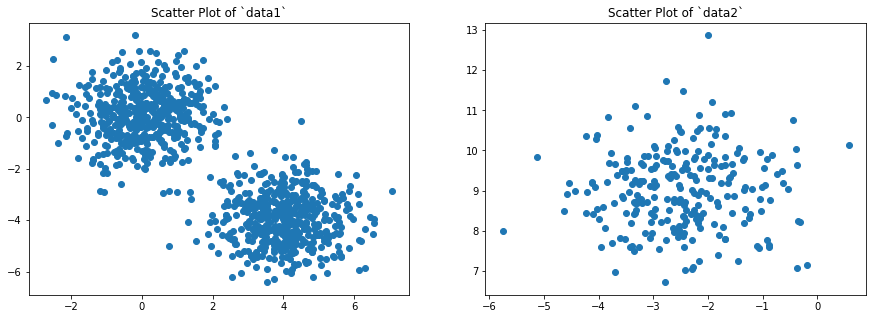

In [ ]:
# Create Dataset
from sklearn.datasets import make_blobs

data1, label1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
data2, label2 = make_blobs(n_samples=250, centers=1, random_state=42)

# Show Features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data1[:, [0]], data1[:, [1]])
plt.title('Scatter Plot of `data1`')

plt.subplot(1, 2, 2)
plt.scatter(data2[:, [0]], data2[:, [1]])
plt.title('Scatter Plot of `data2`')

plt.show()

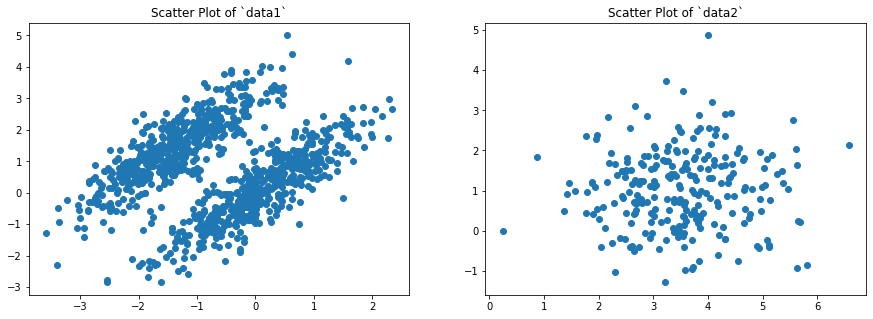

In [ ]:
# Convert to Ellipsoid Form
data1 = data1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
data2 = data2 + [6, -8]

# Show Features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data1[:, [0]], data1[:, [1]])
plt.title('Scatter Plot of `data1`')

plt.subplot(1, 2, 2)
plt.scatter(data2[:, [0]], data2[:, [1]])
plt.title('Scatter Plot of `data2`')

plt.show()

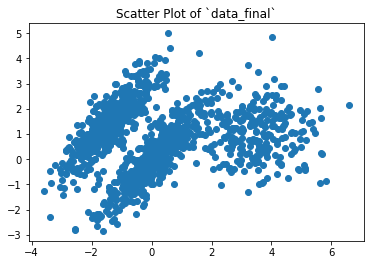

In [ ]:
# Merge `data1` and `data2`
data_final = np.r_[data1, data2]
label_final = np.r_[label1, label2]

# Show Features
plt.scatter(data_final[:, [0]], data_final[:, [1]])
plt.title('Scatter Plot of `data_final`')

plt.show()

In [ ]:
# Display Shape of Dataset

print('Shape - data_final  : ', data_final.shape)
print('Shape - label_final : ', label_final.shape)

Shape - data_final  :  (1250, 2)
Shape - label_final :  (1250,)


## Gaussian Mixture Model

### Train with Gaussian Mixture Model

---
Let's train a Gaussian mixture model on the previous dataset:

In [ ]:
# Train the Model

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(data_final)

GaussianMixture(n_components=3, n_init=10, random_state=42)

---
Let's look at the parameters that the EM algorithm estimated:

In [ ]:
# Display Weights

gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
# Display Means

gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
# Display Variances

gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

Did the algorithm actually converge?

In [ ]:
# Display Converged

gm.converged_

True

Yes, good. How many iterations did it take?

In [ ]:
# Display Number of Step used to Reach the Convergence

gm.n_iter_

4

### Predict with Gaussian Mixture Model

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [ ]:
# Predict as `Hard Clustering`

gm.predict(data_final)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
# Predict as `Soft Clustering`

gm.predict_proba(data_final)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

### Plot Decision Boundary

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [ ]:
# Function to Plot Centroids

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [ ]:
# Function to Plot GMM's Decision Boundary

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

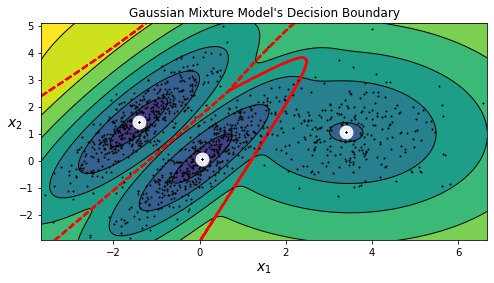

In [ ]:
# Plot GMM's Decision Boundary

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, data_final)
plt.title('Gaussian Mixture Model\'s Decision Boundary')
plt.show()

### Type of Hyperparameter `covariance_type`

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:

* `"full"` (default): no constraint, all clusters can take on **any ellipsoidal shape of any size**.

* `"tied"`: all clusters **must have the same shape**, which can be any ellipsoid (i.e., they all share the same covariance matrix).

* `"spherical"`: all clusters **must be spherical**, but they can have different diameters (i.e., different variances).

* `"diag"`: clusters **can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes** (i.e., the covariance matrices must be diagonal).

In [ ]:
# Train with Different Value of `covariance_type`

## Define the Model
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

## Train the Model using `.fit`
gm_full.fit(data_final)
gm_tied.fit(data_final)
gm_spherical.fit(data_final)
gm_diag.fit(data_final)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [ ]:
# Create Function to Compare Multiple Model of GMM

def compare_gaussian_mixtures(gm1, gm2, gm3, gm4, X):
    plt.figure(figsize=(20, 10))

    plt.subplot(221)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(222)
    plot_gaussian_mixture(gm2, X, show_ylabels=True)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

    plt.subplot(223)
    plot_gaussian_mixture(gm3, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm3.covariance_type), fontsize=14)

    plt.subplot(224)
    plot_gaussian_mixture(gm4, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm4.covariance_type), fontsize=14)

    plt.show()

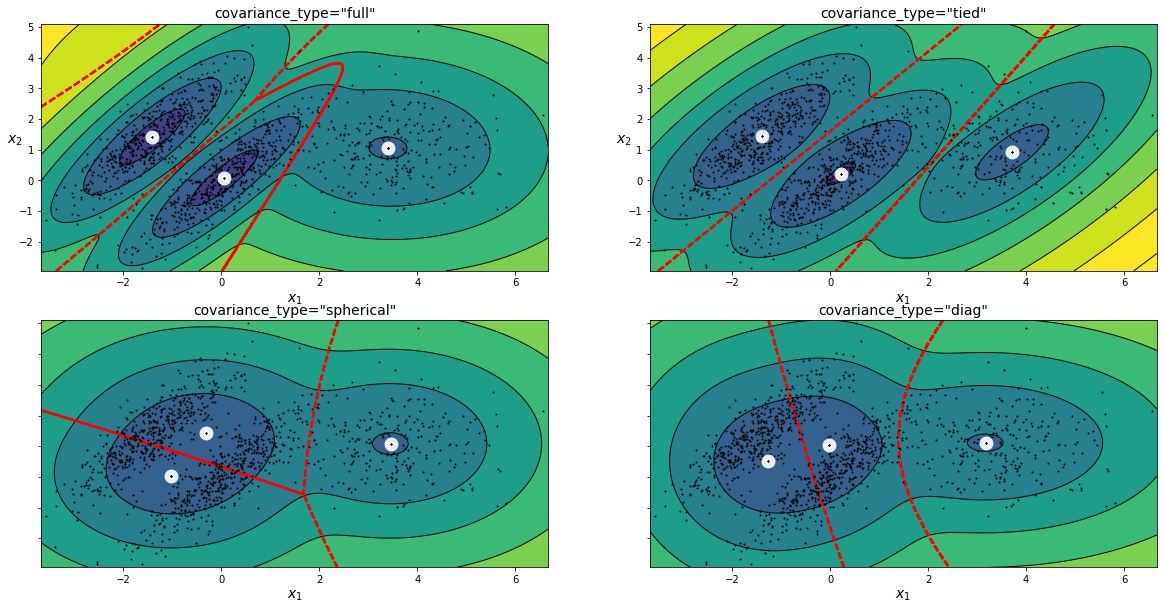

In [ ]:
# Display Comparison

compare_gaussian_mixtures(gm_full, gm_tied, gm_spherical, gm_diag, data_final)

### Model selection

We cannot use the `inertia` or the `silhouette_score` because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [ ]:
# Get `BIC` Score and `AIC` Score for Previous Model

print('BIC Score : ', gm.bic(data_final))
print('AIC Score : ', gm.aic(data_final))

BIC Score :  8189.747000497186
AIC Score :  8102.521720382148


We could compute the BIC manually like this:

In [ ]:
# Compute `BIC` Score and `AIC` Score Manually from Scratch

n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance

max_log_likelihood = gm.score(data_final) * len(data_final) # log(L^)

bic = np.log(len(data_final)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

print('BIC Score : ', bic)
print('AIC Score : ', aic)

BIC Score :  8189.747000497186
AIC Score :  8102.521720382148


---
Let's train Gaussian Mixture models with various values of `k` and measure their `BIC` and `AIC` :

In [ ]:
# Train GMM with Various Number of Clusters

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(data_final)
             for k in range(1, 11)]

In [ ]:
# Get BIC and AIC Scores

bics = [model.bic(data_final) for model in gms_per_k]
aics = [model.aic(data_final) for model in gms_per_k]

for k in range(0, 10):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  1 	BIC :  9330.418496222055 	AIC :  9304.764002070573
Cluster :  2 	BIC :  8971.197133122107 	AIC :  8914.757245988847
Cluster :  3 	BIC :  8189.747000497186 	AIC :  8102.521720382148
Cluster :  4 	BIC :  8229.595643711533 	AIC :  8111.584970614717
Cluster :  5 	BIC :  8273.785246729552 	AIC :  8124.989180650959
Cluster :  6 	BIC :  8311.996155416307 	AIC :  8132.414696355936
Cluster :  7 	BIC :  8350.89457398886 	AIC :  8140.52772194671
Cluster :  8 	BIC :  8391.038436209936 	AIC :  8149.886191186008
Cluster :  9 	BIC :  8432.267971405674 	AIC :  8160.3303333999675
Cluster :  10 	BIC :  8465.222274137555 	AIC :  8162.499243150071


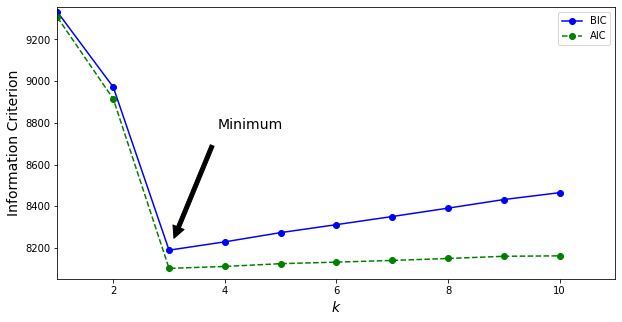

In [ ]:
# Plot BIC Score and AIC Score

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 11, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

Let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [ ]:
# Get Best Cluster and Best Hyperparameter
# You can think this below code is like GridSearchCV on Supervised Learning

%%time
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(data_final).bic(data_final)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print('Best - n_components    : ', best_k)
print('Best - covariance_type : ', best_covariance_type)

Best - n_components    :  3
Best - covariance_type :  full
CPU times: user 14.9 s, sys: 90.7 ms, total: 15 s
Wall time: 8.12 s


## Bayesian Gaussian Mixtures

Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of **giving weights equal (or close) to zero to unnecessary clusters**. 

Just **set the number of components (`n_components`) to a value that you believe is greater than the optimal number of clusters**, and the algorithm will eliminate the unnecessary clusters automatically.

In [ ]:
# Train Model using Bayesian Gaussian Mixture

%%time
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(data_final)

CPU times: user 3.37 s, sys: 13.1 ms, total: 3.39 s
Wall time: 3.15 s


The algorithm automatically detected that only 3 components are needed:

In [ ]:
# Display Weight of Each Cluster

print('Weight - Full Value             : \n', bgm.weights_)
print('')
print('Weight - Round to Two Digits    : \n', np.round(bgm.weights_, 2))
print('')
print('Weight - Gaussian Mixture Model : \n', gm.weights_)

Weight - Full Value             : 
 [3.95095317e-01 2.05162685e-01 3.99662331e-01 7.24246329e-05
 6.58404122e-06 5.98549202e-07 5.44135638e-08 4.94668762e-09
 4.49698874e-10 4.08817159e-11]

Weight - Round to Two Digits    : 
 [0.4  0.21 0.4  0.   0.   0.   0.   0.   0.   0.  ]

Weight - Gaussian Mixture Model : 
 [0.39025715 0.40007391 0.20966893]


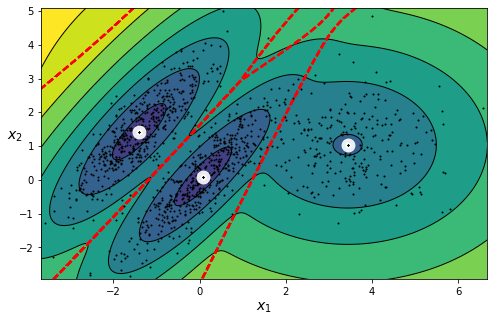

In [ ]:
# Plot Decision Boundary from Bayesian Gaussian Mixture

plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, data_final)
plt.show()